In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing  

from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam 
import seaborn as sns

In [96]:
df = sns.load_dataset('titanic')
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Q) fare(승선가격), 성별 에 따른 생존 유무 예측
w, b 구하고, 정확도를 구하시오. (텐서, 케라스)


# 케라스

In [97]:
def fn( v ):
    if v == 'male':
        return '0'
    else :
        return '1'  

In [98]:
df['sex'] = df['sex'].apply( fn )
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,1,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,0,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,1,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,1,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,0,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [33]:
xdata = df.iloc[:,[2,6]] 
ydata = df.iloc[:,[0]]

In [34]:
feature_scale = preprocessing.MinMaxScaler()
xdataN = feature_scale.fit_transform(xdata)

label_scale = preprocessing.MinMaxScaler()
ydataN = label_scale.fit_transform(ydata)

In [35]:
x = tf.placeholder(tf.float32, shape=[None, xdataN.shape[1]])
y = tf.constant(ydataN, tf.float32)
w = tf.Variable(tf.random_uniform([xdata.shape[1], 1]))
b = tf.Variable(tf.random_uniform([1]))

hx = tf.matmul(x,w) + b
cost = tf.reduce_mean( cost_i )
cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)

optimizer = tf.train.AdamOptimizer(0.1) #learning rate
train = optimizer.minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(100000):
    sess.run(train, {x:xdataN})
#     print(i, sess.run(cost, {x:xdataN}))    

In [36]:
sess.run(w)

array([[0.52272683],
       [0.8210922 ]], dtype=float32)

In [37]:
sess.run(b)

array([0.1479784], dtype=float32)

In [39]:
arr = feature_scale.transform([[0, 53]])
label_scale.inverse_transform(sess.run(hx, {x:arr}))

array([[0.23291966]], dtype=float32)

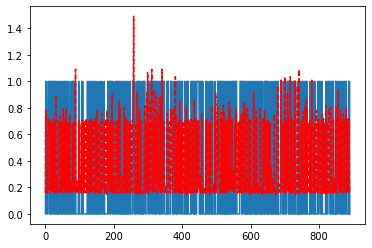

In [40]:
plt.plot(ydataN)
plt.plot(sess.run(hx, {x:xdataN}),'r--')
plt.show()

In [45]:
sess.run( hx, {x:[[0, 53]]} )

array([[43.665867]], dtype=float32)

# 텐서 플로우

In [148]:
xdata = df.iloc[:,[2,6]] 
ydata = df.iloc[:,[0]]

In [149]:
x = tf.placeholder( tf.float32 , shape =[None,2])
y = tf.constant( ydata, tf.float32)

In [150]:
# feature의 개수 4개 

w = tf.Variable( tf.random_uniform([2,1]))
b = tf.Variable( tf.random_uniform([1]))

In [151]:
hx = tf.matmul( x,w ) + b    # n x 4 행렬   +      4 x 1 행렬    => n x 1 행렬

cost = tf.reduce_mean(tf.square(hx-y))

In [152]:
optimizer = tf.train.AdamOptimizer( 0.0001 ) 

train = optimizer.minimize( cost )

In [153]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [154]:
# 트레이닝
for i in range(10000) :
    # x가 placeholder이므로 feed_dict 줘야 함
    sess.run( train, {x:xdata} )
    print(i, sess.run(cost, {x:xdata}))

0 2256.0393
1 2255.4692
2 2254.8992
3 2254.329
4 2253.759
5 2253.1895
6 2252.6196
7 2252.05
8 2251.4805
9 2250.911
10 2250.3418
11 2249.7722
12 2249.2034
13 2248.6343
14 2248.0652
15 2247.4968
16 2246.928
17 2246.3594
18 2245.7905
19 2245.2222
20 2244.654
21 2244.0854
22 2243.5176
23 2242.9487
24 2242.381
25 2241.8125
26 2241.2446
27 2240.6772
28 2240.11
29 2239.542
30 2238.975
31 2238.4075
32 2237.8406
33 2237.273
34 2236.7058
35 2236.1396
36 2235.5723
37 2235.0054
38 2234.4392
39 2233.8728
40 2233.3066
41 2232.74
42 2232.1743
43 2231.608
44 2231.042
45 2230.476
46 2229.9102
47 2229.344
48 2228.7786
49 2228.2136
50 2227.6477
51 2227.0825
52 2226.5173
53 2225.9526
54 2225.3877
55 2224.8225
56 2224.258
57 2223.693
58 2223.1282
59 2222.5645
60 2222.0002
61 2221.4358
62 2220.8718
63 2220.3076
64 2219.7441
65 2219.1802
66 2218.6165
67 2218.0527
68 2217.4895
69 2216.9263
70 2216.3628
71 2215.8003
72 2215.2373
73 2214.6738
74 2214.1113
75 2213.5483
76 2212.9858
77 2212.423
78 2211.8606
79 22

In [155]:
scale = preprocessing.MinMaxScaler()
dataN = scale.fit_transform( xdata )

In [156]:
dataN

array([[0.        , 0.01415106],
       [1.        , 0.13913574],
       [1.        , 0.01546857],
       ...,
       [1.        , 0.04577135],
       [0.        , 0.0585561 ],
       [0.        , 0.01512699]])

In [158]:
xdata = dataN[:,[0]]
ydata = dataN[:,[1]]

In [135]:
arr = scale.transform([[0, 53, None]])

ValueError: operands could not be broadcast together with shapes (1,3) (2,) (1,3) 

In [133]:
# 슬라이싱
arr[:, :-1]

ValueError: operands could not be broadcast together with shapes (1,3) (2,) (1,3) 

In [109]:
sess.run(w)

array([[-0.5726791 ],
       [ 0.09605869]], dtype=float32)

In [110]:
sess.run(b)

array([-0.3517911], dtype=float32)

In [121]:
arr = scale.transform([[0, 53, None]])

ValueError: operands could not be broadcast together with shapes (1,3) (2,) (1,3) 

In [111]:
sess.run(hx, {x:[[0, 53]]})

array([[4.73932]], dtype=float32)

In [113]:
f = scale.inverse_transform([[None,4.73932]])
f


array([[          nan, 2428.09202414]])

In [80]:
IO = Dense( units = 1, input_dim = 2, activation = 'sigmoid') # 입력값 8개
model = Sequential( [IO] )
model.compile(loss = 'binary_crossentropy', 
              optimizer = Adam(0.1), metrics=['accuracy']) #로그함수 사용
h = model.fit(xdata,ydata, epochs=1000) # 1000번 돌림

Train on 891 samples
Epoch 1/1000
891/891 [==============================] - 0s 103us/sample - loss: 1.0249 - acc: 0.5230
Epoch 2/1000
891/891 [==============================] - 0s 32us/sample - loss: 0.6320 - acc: 0.7116
Epoch 3/1000
891/891 [==============================] - 0s 32us/sample - loss: 0.5576 - acc: 0.7587
Epoch 4/1000
891/891 [==============================] - 0s 32us/sample - loss: 0.5418 - acc: 0.7744
Epoch 5/1000
891/891 [==============================] - 0s 38us/sample - loss: 0.5538 - acc: 0.7632
Epoch 6/1000
891/891 [==============================] - 0s 36us/sample - loss: 0.5263 - acc: 0.7789
Epoch 7/1000
891/891 [==============================] - 0s 32us/sample - loss: 0.5127 - acc: 0.7823
Epoch 8/1000
891/891 [==============================] - 0s 26us/sample - loss: 0.5458 - acc: 0.7677
Epoch 9/1000
891/891 [==============================] - 0s 32us/sample - loss: 0.6192 - acc: 0.7419
Epoch 10/1000
891/891 [==============================] - 0s 28us/sample - loss

In [81]:
model.predict(xdata)

array([[0.16379237],
       [0.9700426 ],
       [0.69616747],
       [0.9380504 ],
       [0.16842419],
       [0.1708282 ],
       [0.5583768 ],
       [0.25876907],
       [0.7237669 ],
       [0.8525615 ],
       [0.76779795],
       [0.8330864 ],
       [0.16842419],
       [0.34841704],
       [0.69554114],
       [0.76254034],
       [0.32830155],
       [0.19942042],
       [0.77734494],
       [0.68994296],
       [0.30016643],
       [0.19942042],
       [0.697088  ],
       [0.38950473],
       [0.7987981 ],
       [0.8593465 ],
       [0.16364929],
       [0.9998838 ],
       [0.6957624 ],
       [0.16752338],
       [0.31549045],
       [0.99867177],
       [0.694618  ],
       [0.18325871],
       [0.81779796],
       [0.55979365],
       [0.16367331],
       [0.16842419],
       [0.77734494],
       [0.7246719 ],
       [0.70969546],
       [0.7982937 ],
       [0.16752338],
       [0.9034272 ],
       [0.6957624 ],
       [0.16842419],
       [0.21662939],
       [0.694

In [82]:
model.predict_classes(xdata)

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
    

In [83]:
h.history['acc'][-1]

0.77665544

In [84]:
sess.run(w)

array([[0.46479774],
       [0.00079067]], dtype=float32)

In [85]:
sess.run(b)

array([0.26241463], dtype=float32)